# IMPORTIG PACKAGES

In [33]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# IMPORTING THE DATASET

In [34]:
df=pd.read_csv("basket_analysis.csv")

In [35]:
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.shape

(999, 17)

In [37]:
df.describe()

,Unnamed: 0
count,999.000000
mean,499.000000
std,288.530761
min,0.000000
25%,249.500000
50%,499.000000
75%,748.500000
max,998.000000


In [38]:
df.isnull()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# CREATING A FREQUENT SET

In [39]:
df.drop(df.columns[0],axis=1,inplace=True)

In [40]:
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

In [41]:
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(Yogurt, chocolate, Onion)"
692,0.087087,"(Sugar, Unicorn, Yogurt)"
693,0.090090,"(Sugar, chocolate, Unicorn)"
694,0.095095,"(Sugar, chocolate, Yogurt)"


In [42]:
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [43]:
print(rules)

             antecedents          consequents  antecedent support  \
0                (Bread)              (Apple)            0.384384   
1                (Apple)              (Bread)            0.383383   
2               (Butter)              (Apple)            0.420420   
3                (Apple)             (Butter)            0.383383   
4               (Cheese)              (Apple)            0.404404   
..                   ...                  ...                 ...   
433       (Milk, Yogurt)          (chocolate)            0.190190   
434  (Yogurt, chocolate)               (Milk)            0.198198   
435               (Milk)  (Yogurt, chocolate)            0.405405   
436          (chocolate)       (Milk, Yogurt)            0.421421   
437             (Yogurt)    (Milk, chocolate)            0.420420   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.383383  0.154154    0.401042  1.046059  0.006788    1.029482   
1        

# adding antecedent(foreruning) & consequent(foregoing)

In [44]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

In [45]:
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
403,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
324,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
392,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
259,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
...,...,...,...,...,...,...,...,...,...,...
287,(Butter),"(Ice cream, Unicorn)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444,0.383420
371,(Yogurt),"(Corn, Kidney Beans)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306,0.310881
321,(Yogurt),"(Nutmeg, Butter)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365,0.289119
323,(Butter),"(Yogurt, Nutmeg)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248,0.332642


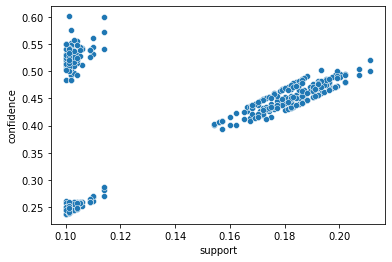

In [46]:
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

In [47]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

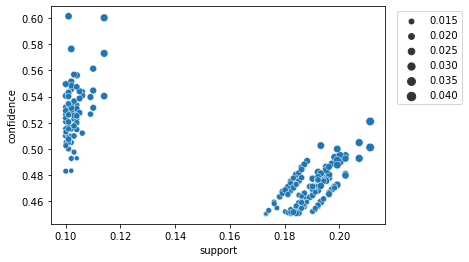

In [48]:
sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [49]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]

In [50]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
68,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,0.260247
69,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
70,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960,0.235537
71,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909,0.241639
72,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
73,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484,0.256294
74,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635,0.241472
75,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838,0.234584


In [90]:
import pandas as pd

# Load the association rules data
def load_association_rules():
    return rules

# Function to recommend items based on user input
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by lift in descending order
    filtered_rules = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = filtered_rules['consequents'].tolist()
    return recommended_items[0]

# Main function to demonstrate usage
def main():
    # Load association rules
    rules = load_association_rules()
    # Example user input
    user_input = input()

    # Get recommended items based on user input
    recommended_items = recommend_items(rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)

if __name__ == "__main__":
    main()


Recommended items for Kidney Beans : frozenset({'Butter'})


In [52]:
import pandas as pd

# Load the association rules data
def load_association_rules():
    return rules

# Function to recommend items based on user input
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by support in descending order
    filtered_rules1 = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = filtered_rules1['consequents'].tolist()
    return recommended_items[0]

# Main function to demonstrate usage
def main():
    # Load association rules
    rules = load_association_rules()
    # Example user input
    user_input = input()

    # Get recommended items based on user input
    recommended_items = recommend_items(rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)

if __name__ == "__main__":
    main()


Recommended items for Butter : frozenset({'Ice cream'})


In [62]:
#filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by support in descending order
filtered_rules1 = filtered_rules.sort_values(by='support', ascending=False)

In [53]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1571138333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1571138333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1571138333.py:4: SettingWithCopyWarning: 
A value is trying 

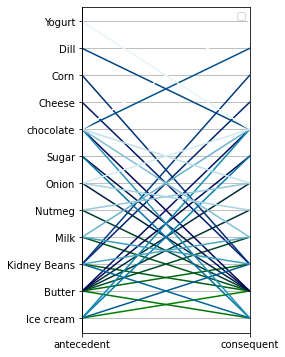

In [54]:
from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(filtered_rules)
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7560\1019086969.py:9: UserWarning: Matplotlib is currently using module

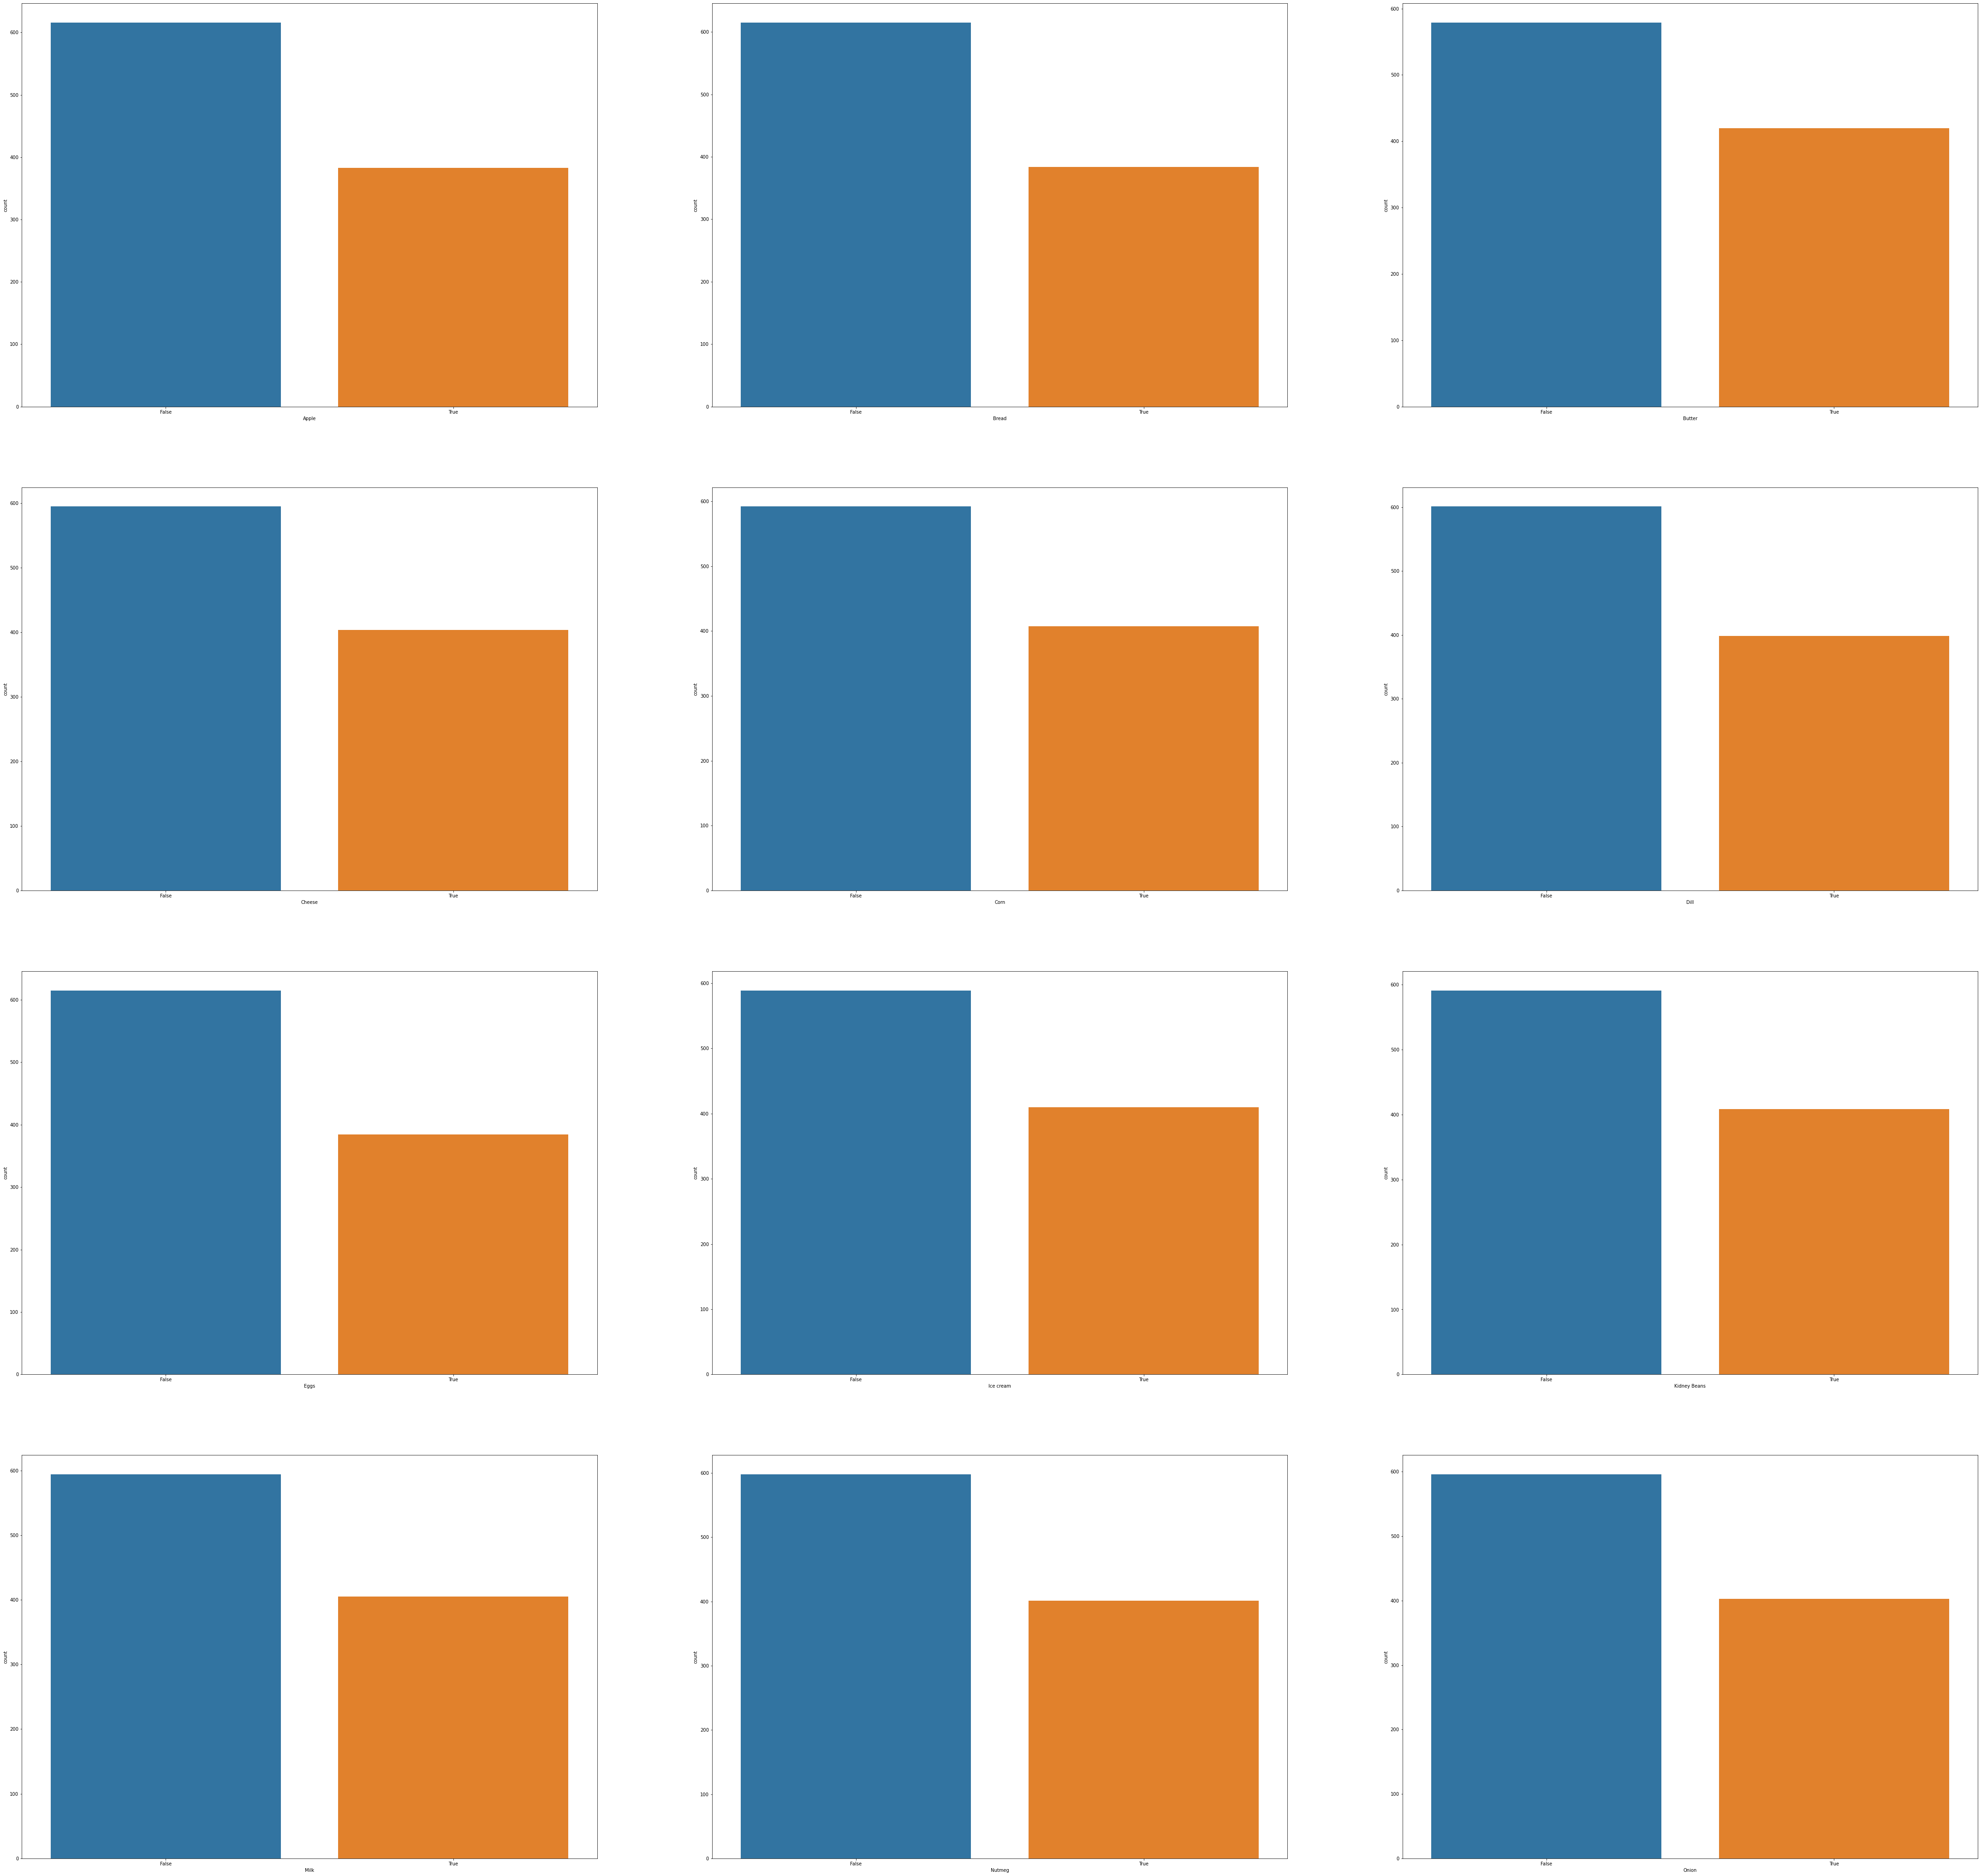

In [55]:
fig,ax=plt.subplots(4,3) 
count=0 
fig.set_figheight(74) 
fig.set_figwidth(76) 
for rows in range(4): 
    for cols in range(3): 
        sns.countplot(data=df,x=df.columns[count],ax=ax[rows][cols]) 
        count+=1 
        fig.show()

In [56]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
df = pd.read_csv("basket_analysis.csv")

# Drop the first column (Unnamed)
df.drop(df.columns[0], axis=1, inplace=True)

# Create frequent itemsets using Apriori
frequent_itemsets = apriori(df,
                             min_support=0.006,
                             max_len=3,
                             use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets,
                          metric='support',
                          min_threshold=0.1)

# Filter rules based on criteria
filtered_rules = rules[(rules['antecedent support'] > 0.02) &
                       (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.2) &
                       (rules['lift'] > 1.0) &
                       (rules['support'] > 0.195)]

# Display the filtered rules
print(filtered_rules)


        antecedents     consequents  antecedent support  consequent support  \
66      (Ice cream)        (Butter)            0.410410            0.420420   
67         (Butter)     (Ice cream)            0.420420            0.410410   
68         (Butter)  (Kidney Beans)            0.420420            0.408408   
69   (Kidney Beans)        (Butter)            0.408408            0.420420   
70           (Milk)        (Butter)            0.405405            0.420420   
71         (Butter)          (Milk)            0.420420            0.405405   
72         (Nutmeg)        (Butter)            0.401401            0.420420   
73         (Butter)        (Nutmeg)            0.420420            0.401401   
74         (Butter)         (Onion)            0.420420            0.403403   
75          (Onion)        (Butter)            0.403403            0.420420   
76          (Sugar)        (Butter)            0.409409            0.420420   
77         (Butter)         (Sugar)            0.420

In [57]:
import joblib 
#joblib.dump(rules,'association_rules.pkl')

In [58]:
Rules = joblib.load('association_rules.pkl')

In [59]:
#joblib.dump(filtered_rules,'filter.pkl')

In [60]:
Fr=joblib.load('filter.pkl')

In [63]:
joblib.dump(filtered_rules1,'f1rules.pkl')

['f1rules.pkl']

In [64]:
F1 = joblib.load('f1rules.pkl')

In [73]:
import pandas as pd
import joblib
Rules = joblib.load('association_rules.pkl')
Fr=joblib.load('filter.pkl')
#F1 = joblib.load('f1rules.pkl')

# Load the association rules data
def load_association_rules():
    return Rules

# Function to recommend items based on user input
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by support in descending order
    #filtered_rules = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = Fr['consequents'].tolist()
    return recommended_items[0]

# Main function to demonstrate usage
def main():
    # Load association rules
    rules = load_association_rules()
    # Example user input
    user_input = input()

    # Get recommended items based on user input
    recommended_items = recommend_items(rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)

if __name__ == "__main__":
    main()

Recommended items for Butter : frozenset({'Butter'})


In [82]:
import pandas as pd

# Load the association rules data
def load_association_rules():
    return Rules

# Function to recommend items based on user input
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by lift in descending order
    filtered_rules2 = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = filtered_rules2['consequents'].tolist()
    return recommended_items[0]

# Main function to demonstrate usage
def main():
    # Load association rules
    rules = load_association_rules()
    # Example user input
    user_input = input()

    # Get recommended items based on user input
    recommended_items = recommend_items(rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)

if __name__ == "__main__":
    main()

Recommended items for Butter : frozenset({'Ice cream'})


In [83]:
filtered_rules2 = filtered_rules.sort_values(by='support', ascending=False)

In [84]:
joblib.dump(filtered_rules2,'fr2.pkl')

['fr2.pkl']

In [85]:
F2 = joblib.load('fr2.pkl')

In [87]:
import pandas as pd

# Load the association rules data
def load_association_rules():
    return Rules

# Function to recommend items based on user input
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    #filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by lift in descending order
    #filtered_rules2 = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = F2['consequents'].tolist()
    return recommended_items[0]

# Main function to demonstrate usage
def main():
    # Load association rules
    rules = load_association_rules()
    # Example user input
    user_input = input()

    # Get recommended items based on user input
    recommended_items = recommend_items(rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)

if __name__ == "__main__":
    main()

Recommended items for Butter : frozenset({'Milk'})


In [3]:
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by lift in descending order
    filtered_rules = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = filtered_rules['consequents'].tolist()
    return recommended_items[0]

In [3]:
import joblib

In [4]:
joblib.dump(recommend_items, 'recommend_items.pkl')

['recommend_items.pkl']

In [6]:
import pandas as pd
import joblib
item = joblib.load('recommend_items.pkl')
Rules = joblib.load('association_rules.pkl')
def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    # Sort rules by lift in descending order
    filtered_rules = filtered_rules.sort_values(by='support', ascending=False)
    # Extract recommended items from consequents column
    recommended_items = filtered_rules['consequents'].tolist()
    return recommended_items[0]


# Load the association rules data
def load_association_rules():
    return Rules
def main():
    # Load association rules
    rules = load_association_rules()
    # Example user input
    user_input = input()

    # Get recommended items based on user input
    recommended_items = item(Rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)
if __name__ == "__main__":
    main()    


Recommended items for Ice cream : frozenset({'Butter'})
